# Udacity ML Azure Pipeline Optimization
## A closer look at the dataset

In [1]:
import numpy as np
import pandas as pd

## Read the dataset into a DataFrame

In [63]:
raw_data_url = "https://automlsamplenotebookdata.blob.core.windows.net/automl-sample-notebook-data/bankmarketing_train.csv"

df = pd.read_csv(raw_data_url)

## The Dataset Features 

Input features and target

In [71]:
print("Columns:",df.columns.values) # Get the values from the Index object 'columns' 
print("Total features:",df.columns.shape[0]) # Get the total number of features: inputs plus target

Columns: ['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed'
 'y']
Total features: 21


## Generate descriptive statistics.

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [40]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.040212,257.335205,2.561730,962.174780,0.174780,0.076228,93.574243,-40.518680,3.615654,5166.859608
std,10.432313,257.331700,2.763646,187.646785,0.496503,1.572242,0.578636,4.623004,1.735748,72.208448
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,318.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Plot the target distribution

Here the plot will show what the distribution of the target values looks like. This is important when considering whether any measures need to be taken to deal with data imbalance and how the test results obtained from a trained predictive model should be interpreted.

29258

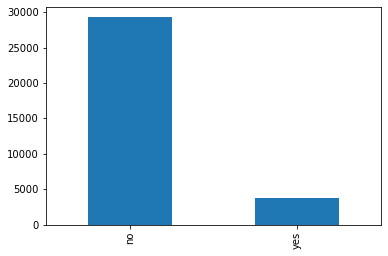

In [57]:
df['y'].value_counts().plot.bar()
df['y'].value_counts()

### Accuracy to beat

In order to carry out an effective assessment of a model trained using this dataset it is necessary to know what the minimum accuracy after training should be in order to have a model which performs better than chance.

For a binary problem with a balanced dataset, 50% accuracy or better would be adequate. Here however, the dataset is imbalanced. 

In [61]:
dataset_accuracy = df['y'].value_counts()['no']/(df['y'].value_counts()['no'] + df['y'].value_counts()['yes'])
print('Score if just predict \'no\' for all examples...')
print('Dataset accuracy:',dataset_accuracy)

Score if just predict 'no' for all examples...
Dataset accuracy: 0.8879514415781488


## Now take a look at the distribution of the values of certain input features

admin.           8339
blue-collar      7356
technician       5426
services         3161
management       2343
retired          1388
entrepreneur     1193
self-employed    1140
housemaid         854
unemployed        793
student           682
unknown           275
Name: job, dtype: int64

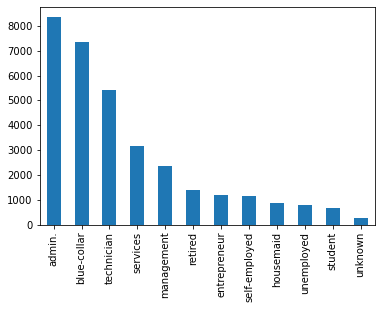

In [4]:
df['job'].value_counts().plot.bar()
df['job'].value_counts()

married     19966
single       9242
divorced     3676
unknown        66
Name: marital, dtype: int64

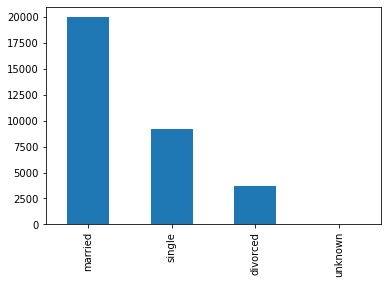

In [5]:
df['marital'].value_counts().plot.bar()
df['marital'].value_counts()

married     17939
single       7963
divorced     3300
unknown        56
Name: marital, dtype: int64

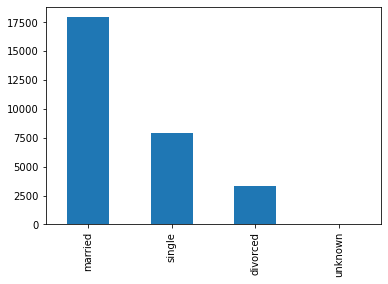

In [6]:
df_no = df.loc[df['y'].isin(['no'])]
df_no['marital'].value_counts().plot.bar()
df_no['marital'].value_counts()

married     2027
single      1279
divorced     376
unknown       10
Name: marital, dtype: int64

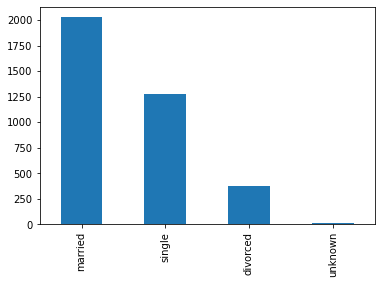

In [7]:
df_yes = df.loc[df['y'].isin(['yes'])]
df_yes['marital'].value_counts().plot.bar()
df_yes['marital'].value_counts()

marital,married,single,divorced,unknown
y,,,,
no,17939,7963,3300,56
yes,2027,1279,376,10


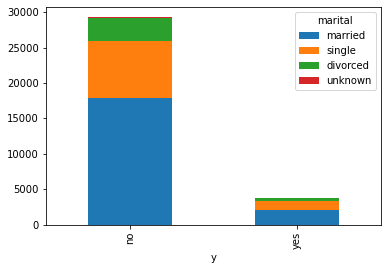

In [11]:
df_sorted = df.copy()
df_sorted = df_sorted.groupby('y').apply(lambda x: x['marital'].value_counts())
#df_sorted = df_sorted.unstack().fillna(0)
df_sorted.plot.bar(stacked=True)
df_sorted

y,no,yes
marital,,
divorced,3300,376
married,17939,2027
single,7963,1279
unknown,56,10


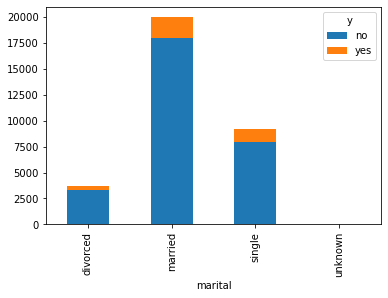

In [12]:
df_sorted = df.copy()
df_sorted = df_sorted.groupby('marital').apply(lambda x: x['y'].value_counts())
#df_sorted = df_sorted.unstack().fillna(0)
df_sorted.plot.bar(stacked=True)
df_sorted

contact,cellular,telephone
y,,
no,17881,11377
yes,3065,627


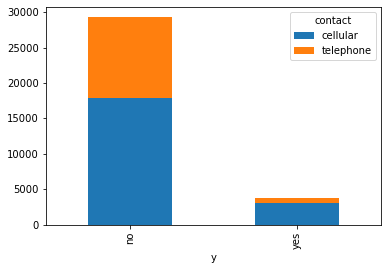

In [13]:
df_sorted = df.copy()
df_sorted = df_sorted.groupby('y').apply(lambda x: x['contact'].value_counts())
#df_sorted = df_sorted.unstack().fillna(0)
df_sorted.plot.bar(stacked=True)
df_sorted

y,no,yes
contact,,
cellular,17881,3065
telephone,11377,627


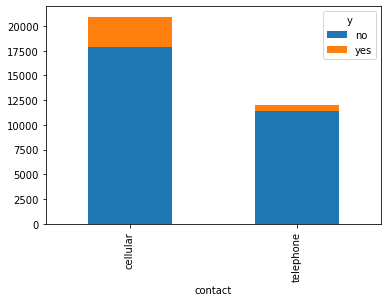

In [21]:
df_sorted = df.copy()
df_sorted = df_sorted.groupby('contact').apply(lambda x: x['y'].value_counts())
#df_sorted = df_sorted.unstack().fillna(0)
df_sorted.plot.bar(stacked=True)
df_sorted

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,7260,6858,1091,763,2077,1036,1023,2912,468,4847,677,246
yes,1079,498,102,91,266,352,117,249,214,579,116,29


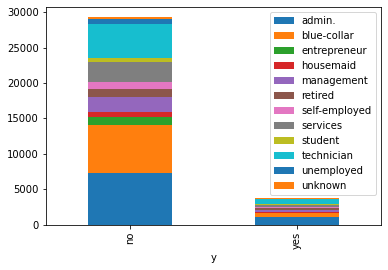

In [51]:
df_sorted = df.copy()
df_sorted = df_sorted.groupby('y').apply(lambda x: x['job'].value_counts())
df_sorted = df_sorted.unstack().fillna(0)
df_sorted.plot.bar(stacked=True)
df_sorted

y,no,yes
job,,
admin.,7260,1079
blue-collar,6858,498
entrepreneur,1091,102
housemaid,763,91
management,2077,266
retired,1036,352
self-employed,1023,117
services,2912,249
student,468,214


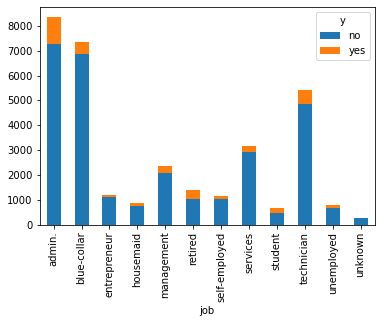

In [52]:
df_sorted = df.copy()
df_sorted = df_sorted.groupby('job').apply(lambda x: x['y'].value_counts())
#df_sorted = df_sorted.unstack().fillna(0)
df_sorted.plot.bar(stacked=True)
df_sorted

,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,,,
no,2994,1696,4486,6729,11,3758,8388,1196
yes,339,151,374,824,4,471,1329,200


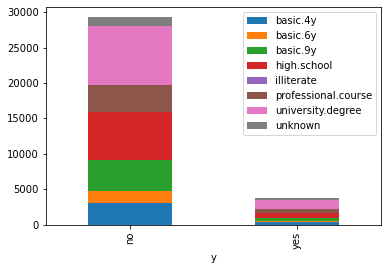

In [24]:
df_sorted = df.copy()
df_sorted = df_sorted.groupby('y').apply(lambda x: x['education'].value_counts())
df_sorted = df_sorted.unstack().fillna(0)
df_sorted.plot.bar(stacked=True)
df_sorted

y,no,yes
education,,
basic.4y,2994,339
basic.6y,1696,151
basic.9y,4486,374
high.school,6729,824
illiterate,11,4
professional.course,3758,471
university.degree,8388,1329
unknown,1196,200


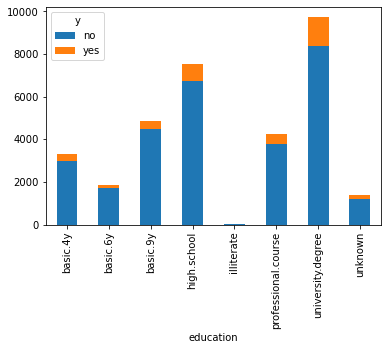

In [19]:
df_sorted = df.copy()
df_sorted = df_sorted.groupby('education').apply(lambda x: x['y'].value_counts())
#df_sorted = df_sorted.unstack().fillna(0)
df_sorted.plot.bar(stacked=True)
df_sorted

,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,,,
no,2994,1696,4486,6729,11,3758,8388,1196
yes,339,151,374,824,4,471,1329,200


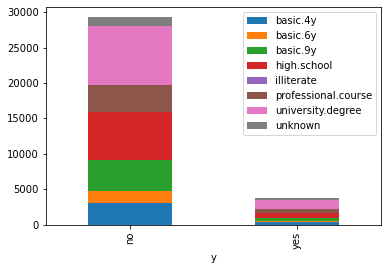

no   yes
education job                       
basic.4y  admin.          50.0   9.0
          blue-collar   1715.0  90.0
          entrepreneur   110.0   6.0
          housemaid      346.0  42.0
          management      80.0   5.0
...                        ...   ...
unknown   services       104.0  14.0
          student         87.0  49.0
          technician     147.0  17.0
          unemployed      10.0   5.0
          unknown         98.0  13.0

[90 rows x 2 columns]

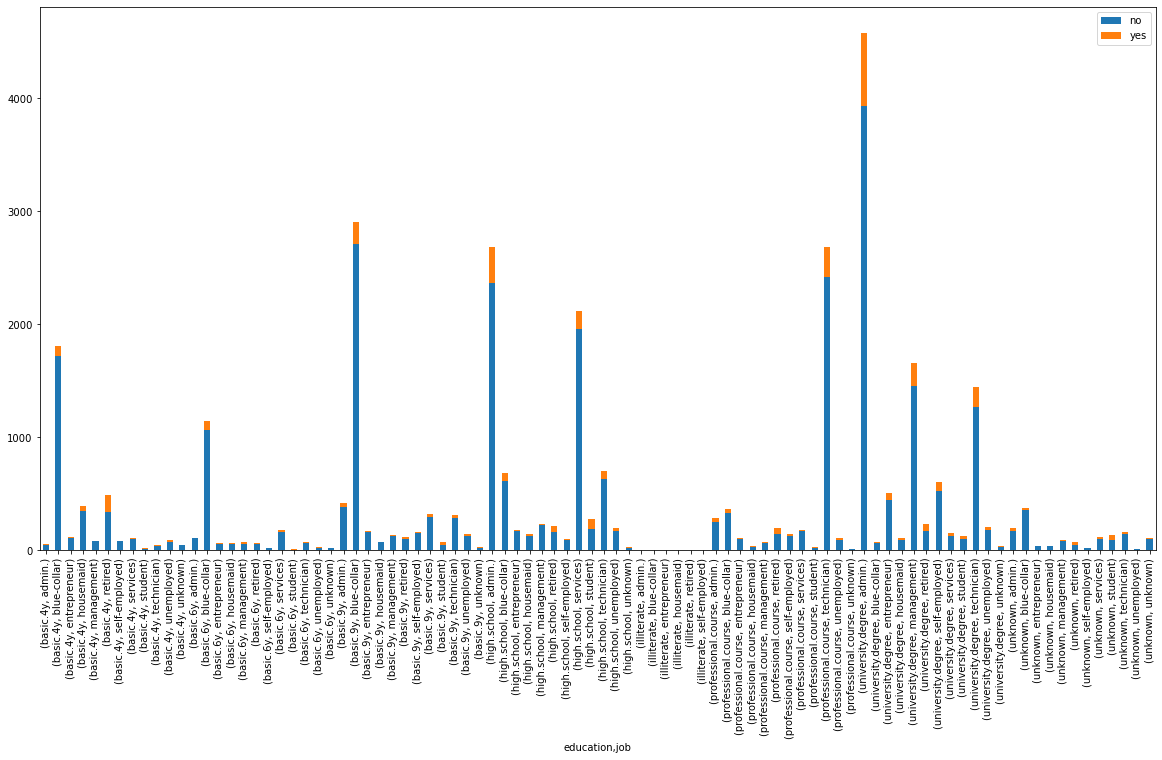

In [55]:
df_sorted = df.copy()
df_sorted = df_sorted.groupby(['education','job']).apply(lambda x: x['y'].value_counts())
df_sorted = df_sorted.unstack().fillna(0)
df_sorted.plot(figsize=(20,10),kind='bar',stacked=True)#.bar(stacked=True)
df_sorted

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education,,,,,,,,,,,,
basic.4y,59.0,1805.0,116.0,388.0,85.0,485.0,83.0,107.0,21.0,45.0,91.0,48.0
basic.6y,112.0,1143.0,66.0,65.0,70.0,66.0,23.0,176.0,10.0,73.0,26.0,17.0
basic.9y,417.0,2906.0,171.0,73.0,134.0,118.0,163.0,317.0,75.0,314.0,147.0,25.0
high.school,2686.0,680.0,183.0,141.0,234.0,213.0,96.0,2114.0,281.0,699.0,200.0,26.0
illiterate,1.0,7.0,2.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
professional.course,284.0,367.0,109.0,41.0,71.0,196.0,146.0,179.0,33.0,2684.0,109.0,10.0
university.degree,4579.0,72.0,504.0,106.0,1654.0,232.0,604.0,150.0,126.0,1447.0,205.0,38.0
unknown,201.0,376.0,42.0,39.0,95.0,76.0,23.0,118.0,136.0,164.0,15.0,111.0


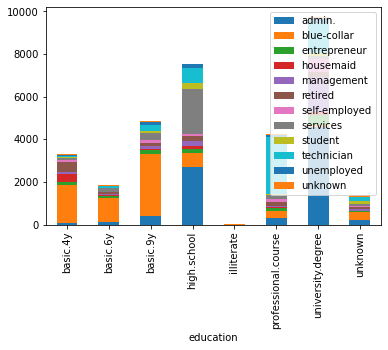

In [27]:
df_sorted = df.copy()
df_sorted = df_sorted.groupby('education').apply(lambda x: x['job'].value_counts())
df_sorted = df_sorted.unstack().fillna(0)
df_sorted.plot.bar(stacked=True)
df_sorted

,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,59.0,112.0,417.0,2686.0,1.0,284.0,4579.0,201.0
blue-collar,1805.0,1143.0,2906.0,680.0,7.0,367.0,72.0,376.0
entrepreneur,116.0,66.0,171.0,183.0,2.0,109.0,504.0,42.0
housemaid,388.0,65.0,73.0,141.0,1.0,41.0,106.0,39.0
management,85.0,70.0,134.0,234.0,0.0,71.0,1654.0,95.0
retired,485.0,66.0,118.0,213.0,2.0,196.0,232.0,76.0
self-employed,83.0,23.0,163.0,96.0,2.0,146.0,604.0,23.0
services,107.0,176.0,317.0,2114.0,0.0,179.0,150.0,118.0
student,21.0,10.0,75.0,281.0,0.0,33.0,126.0,136.0


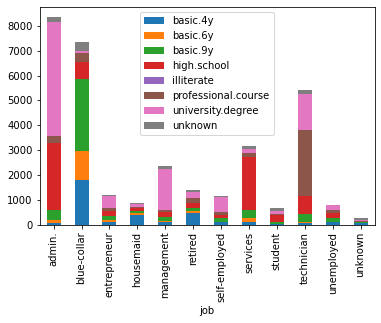

In [28]:
df_sorted = df.copy()
df_sorted = df_sorted.groupby('job').apply(lambda x: x['education'].value_counts())
df_sorted = df_sorted.unstack().fillna(0)
df_sorted.plot.bar(stacked=True)
df_sorted

,no,unknown,yes
y,,,
no,22729.0,6526.0,3.0
yes,3335.0,357.0,0.0


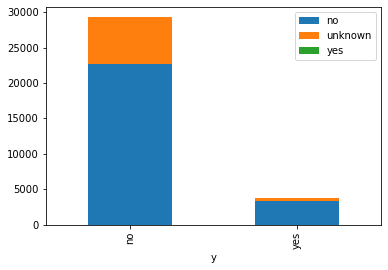

In [35]:
df_sorted = df.copy()
df_sorted = df_sorted.groupby('y').apply(lambda x: x['default'].value_counts())
df_sorted = df_sorted.unstack().fillna(0)
df_sorted.plot.bar(stacked=True)
df_sorted

housing,yes,no,unknown
y,,,
no,15251,13306,701
yes,1981,1630,81


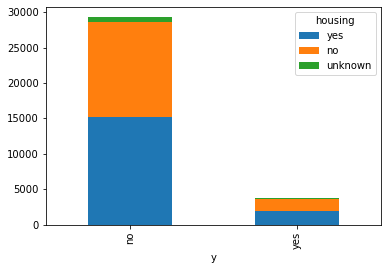

In [37]:
df_sorted = df.copy()
df_sorted = df_sorted.groupby('y').apply(lambda x: x['housing'].value_counts())
#df_sorted = df_sorted.unstack().fillna(0)
df_sorted.plot.bar(stacked=True)
df_sorted

loan,no,yes,unknown
y,,,
no,24087,4470,701
yes,3079,532,81


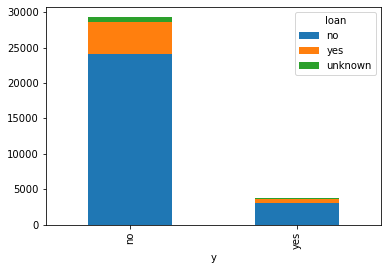

In [39]:
df_sorted = df.copy()
df_sorted = df_sorted.groupby('y').apply(lambda x: x['loan'].value_counts())
#df_sorted = df_sorted.unstack().fillna(0)
df_sorted.plot.bar(stacked=True)
df_sorted

,failure,nonexistent,success
y,,,
no,2975,25888,395
yes,476,2506,710


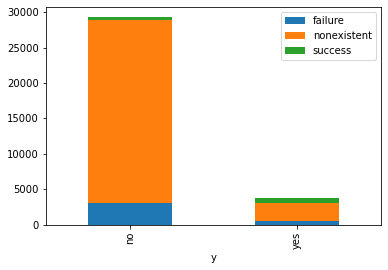

In [43]:
df_sorted = df.copy()
df_sorted = df_sorted.groupby('y').apply(lambda x: x['poutcome'].value_counts())
df_sorted = df_sorted.unstack().fillna(0)
df_sorted.plot.bar(stacked=True)
df_sorted

,no,yes
month,,
apr,1674,434
aug,4361,521
dec,75,69
jul,5238,515
jun,3798,453
mar,201,220
may,10374,699
nov,2961,335
oct,328,241


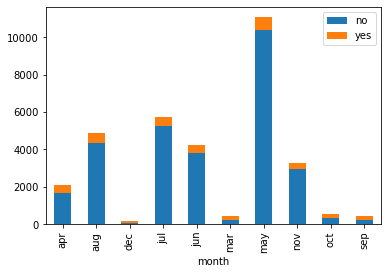

In [46]:
df_sorted = df.copy()
df_sorted = df_sorted.groupby('month').apply(lambda x: x['y'].value_counts())
df_sorted = df_sorted.unstack().fillna(0)
df_sorted.plot.bar(stacked=True)
df_sorted

,fri,mon,thu,tue,wed
y,,,,,
no,5588,6135,6105,5723,5707
yes,671,667,832,761,761


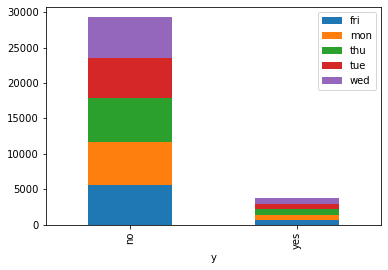

In [48]:
df_sorted = df.copy()
df_sorted = df_sorted.groupby('y').apply(lambda x: x['day_of_week'].value_counts())
df_sorted = df_sorted.unstack().fillna(0)
df_sorted.plot.bar(stacked=True)
df_sorted

y,no,yes
day_of_week,,
fri,5588,671
mon,6135,667
thu,6105,832
tue,5723,761
wed,5707,761


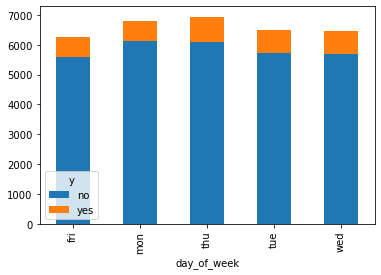

In [50]:
df_sorted = df.copy()
df_sorted = df_sorted.groupby('day_of_week').apply(lambda x: x['y'].value_counts())
#df_sorted = df_sorted.unstack().fillna(0)
df_sorted.plot.bar(stacked=True)
df_sorted

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

raw_data_url = "https://automlsamplenotebookdata.blob.core.windows.net/automl-sample-notebook-data/bankmarketing_train.csv"

df = pd.read_csv(raw_data_url)

def clean_data(data):
    # Dict for cleaning data
    months = {"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12}
    weekdays = {"mon":1, "tue":2, "wed":3, "thu":4, "fri":5, "sat":6, "sun":7}

    # Clean and one hot encode data
    x_df = data.dropna()  # Remove rows with missing values
    # Useful reference:
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
    # Convert categorical variable into dummy/indicator variables (OHE).
    jobs = pd.get_dummies(x_df.job, prefix="job")
    x_df.drop("job", inplace=True, axis=1)
    x_df = x_df.join(jobs)
    # Binary features:
    x_df["marital"] = x_df.marital.apply(lambda s: 1 if s == "married" else 0)
    x_df["default"] = x_df.default.apply(lambda s: 1 if s == "yes" else 0)
    x_df["housing"] = x_df.housing.apply(lambda s: 1 if s == "yes" else 0)
    x_df["loan"] = x_df.loan.apply(lambda s: 1 if s == "yes" else 0)
    # Convert categorical variable into dummy/indicator variables (OHE).
    contact = pd.get_dummies(x_df.contact, prefix="contact")
    x_df.drop("contact", inplace=True, axis=1)
    x_df = x_df.join(contact)
    # Convert categorical variable into dummy/indicator variables (OHE).
    education = pd.get_dummies(x_df.education, prefix="education")
    x_df.drop("education", inplace=True, axis=1)
    x_df = x_df.join(education)
    # Map raw feature values for month and day to integers specified in dictionaries (this method ensures that relative
    # temporal position information is preserved).
    x_df["month"] = x_df.month.map(months)
    x_df["day_of_week"] = x_df.day_of_week.map(weekdays)
    # Binary feature:
    x_df["poutcome"] = x_df.poutcome.apply(lambda s: 1 if s == "success" else 0)

    # Extract the binary target column and convert to integer representation
    y_df = x_df.pop("y").apply(lambda s: 1 if s == "yes" else 0)

    # Note: added missing return statement(!)
    # Return the input and target features
    return x_df, y_df


# Use the clean_data function to clean the data.
x, y = clean_data(df)

# Split into train and test set
# Note: nothing has been specified in the rubric with respect to use of the test set...
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=8, stratify=y)

# Training data as DataFrame (joining input and target feature again into one DataFrame)
# TODO Column names!!!!
df_train = pd.concat([x_train,y_train], axis=1)

In [14]:
df_train

,age,marital,default,housing,loan,month,day_of_week,duration,campaign,pdays,...,contact_telephone,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,y
25582,28,1,0,0,1,5,3,109,1,999,...,1,0,0,1,0,0,0,0,0,0
31381,33,1,0,1,0,5,2,464,2,999,...,1,0,0,1,0,0,0,0,0,0
30358,37,1,0,0,1,6,4,640,3,999,...,1,1,0,0,0,0,0,0,0,0
17782,57,1,0,1,0,8,5,27,6,999,...,0,0,0,1,0,0,0,0,0,0
27779,30,0,0,0,0,11,4,251,1,999,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,47,0,0,1,1,5,1,178,1,999,...,0,0,0,0,0,0,0,1,0,0
15013,33,0,0,1,0,5,3,275,2,999,...,0,0,0,0,0,0,0,1,0,0
30371,55,1,0,0,0,6,5,1469,9,999,...,1,1,0,0,0,0,0,0,0,1
30084,43,0,0,0,0,7,2,120,1,999,...,0,0,0,0,1,0,0,0,0,0


In [15]:
df_train.columns

Index(['age', 'marital', 'default', 'housing', 'loan', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'contact_cellular', 'contact_telephone', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'y'],
      dtype='object')

In [16]:
df_train = df_train.reset_index(drop=True)

In [17]:
df_train

,age,marital,default,housing,loan,month,day_of_week,duration,campaign,pdays,...,contact_telephone,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,y
0,28,1,0,0,1,5,3,109,1,999,...,1,0,0,1,0,0,0,0,0,0
1,33,1,0,1,0,5,2,464,2,999,...,1,0,0,1,0,0,0,0,0,0
2,37,1,0,0,1,6,4,640,3,999,...,1,1,0,0,0,0,0,0,0,0
3,57,1,0,1,0,8,5,27,6,999,...,0,0,0,1,0,0,0,0,0,0
4,30,0,0,0,0,11,4,251,1,999,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22071,47,0,0,1,1,5,1,178,1,999,...,0,0,0,0,0,0,0,1,0,0
22072,33,0,0,1,0,5,3,275,2,999,...,0,0,0,0,0,0,0,1,0,0
22073,55,1,0,0,0,6,5,1469,9,999,...,1,1,0,0,0,0,0,0,0,1
22074,43,0,0,0,0,7,2,120,1,999,...,0,0,0,0,1,0,0,0,0,0


In [18]:
x_test.columns

Index(['age', 'marital', 'default', 'housing', 'loan', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'contact_cellular', 'contact_telephone', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown'],
      dtype='object')

In [19]:
x_test

,age,marital,default,housing,loan,month,day_of_week,duration,campaign,pdays,...,contact_cellular,contact_telephone,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
9552,38,1,0,1,0,5,5,167,1,999,...,0,1,0,0,0,0,0,1,0,0
2502,40,1,0,1,0,7,1,127,3,999,...,1,0,0,1,0,0,0,0,0,0
6935,30,0,0,0,0,8,3,340,2,999,...,1,0,0,0,0,0,0,0,1,0
909,41,1,0,0,0,5,5,206,1,999,...,0,1,0,0,0,0,0,0,1,0
12560,52,0,0,1,0,5,5,158,1,999,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13803,31,1,0,1,0,10,4,760,1,999,...,1,0,0,0,0,0,0,0,1,0
15176,65,1,0,0,0,6,1,145,2,999,...,1,0,1,0,0,0,0,0,0,0
7243,27,0,0,1,0,7,4,606,3,999,...,1,0,0,0,0,1,0,0,0,0
17958,29,1,0,1,0,3,3,60,3,999,...,1,0,0,0,0,0,0,0,1,0
